In [116]:
import pandas as pd

# 0.) Clean the Apple Data to get a quarterly series of EPS.

In [117]:
y = pd.read_csv('AAPL_quarterly_financials.csv')
y.index = y.name
y = pd.DataFrame(y.loc['BasicEPS', :]).iloc[2:,:]

In [118]:
y.index = pd.to_datetime(y.index)

In [119]:
y = y.sort_index().fillna(0.)

# 1.) Come up with 6 search terms you think could nowcast earnings. (Different than the ones I used) Add in 3 terms that that you think will not Nowcast earnings. Pull in the gtrends data. Clean it to have a quarterly average.

In [120]:
from pytrends.request import TrendReq

In [231]:
# Create pytrends object
pytrends = TrendReq(hl='en-US', tz=360)

# Set up the keywords and the timeframe
keywords = ["Iphone","Savings","MacBook","Huawei","Release","Interest Rates", "UCLA", "Muffin","Pets"]  # Add your keywords here
start_date = '2004-01-01'
end_date = '2024-01-01'

# Create an empty DataFrame to store the results
df = pd.DataFrame()

# Iterate through keywords and fetch data
for keyword in keywords:
    pytrends.build_payload([keyword], cat=0, timeframe=f'{start_date} {end_date}', geo='', gprop='')
    interest_over_time_df = pytrends.interest_over_time()
    df[keyword] = interest_over_time_df[keyword]

In [232]:
df = df.resample('Q').mean()

In [233]:
data = pd.concat([y, df], axis = 1).ffill().dropna()

In [234]:
y = data.iloc[:, 0]
X = data.iloc[:, 1:]

# 2.) Normalize all the X data

In [235]:
from sklearn.preprocessing import StandardScaler

In [236]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3.) Import data. Train, Test, Holdout (80%,15%,5%)

# 4.) Run a Lasso with lambda of .5. Plot a bar chart.

In [237]:
from sklearn.linear_model import Lasso

In [238]:
lasso = Lasso(alpha = .1)
lasso.fit(X_scaled, y)

Lasso(alpha=0.1)

In [239]:
coefficients = lasso.coef_

In [240]:
import matplotlib.pyplot as plt

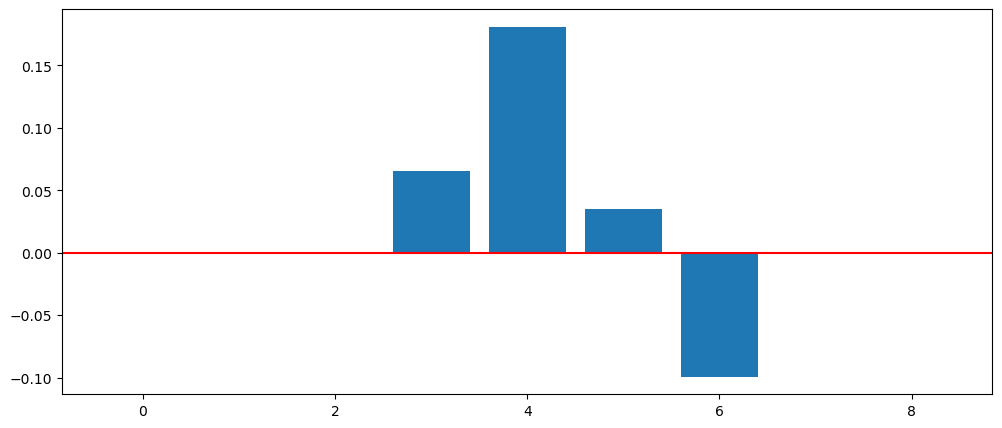

In [241]:
plt.figure(figsize = (12,5))
plt.bar(range(len(coefficients)),coefficients)
plt.axhline(0, color = "red")
plt.show()

# 5.) Do these coefficient magnitudes make sense?

# 6.) Run a for loop looking at 10 different Lambdas and plot the coefficient magnitude for each.

# 7.) Run a cross validation. What is your ideal lambda?